In [3]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

np.random.seed(5)

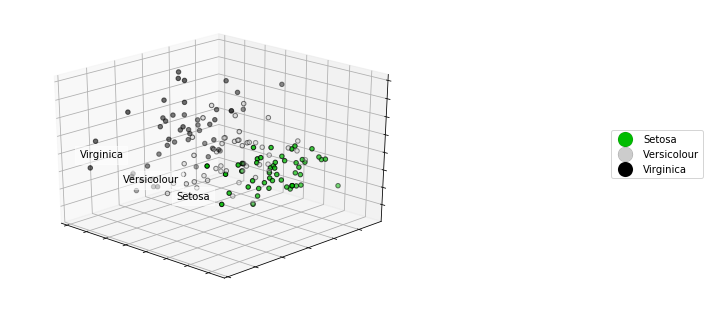

In [42]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data#the floating point values
y = iris.target#unsigned integers specifying group


fig = plt.figure(1, figsize=(6, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=134)

#Applying PCA
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

labelTups = [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]
for name, label in labelTups:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

colors = [plt.cm.spectral(np.float(i/2)) for i in [1, 2, 0]]
custom_lines = [Line2D([0], [0], linestyle="none", marker='.', markeredgecolor='k', markerfacecolor=c, markeredgewidth=.1, markersize=30) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], loc='right', bbox_to_anchor=(1.7, .5))

plt.show()